
# Analyse détaillée du fichier CSV des données de l'emploi dans le domaine Data Science
Ce notebook présente une analyse détaillée des offres d'emploi en Data Science, incluant le nettoyage des données, 
l'analyse exploratoire, l'analyse de texte (NLP), et la visualisation.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:

file_path = 'data_science_job.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')


In [4]:

# Handling missing values
data.fillna('Not specified', inplace=True)

# Simplify categories if necessary
# Example: data['Experience level'] = data['Experience level'].replace({'Not specified': 'Unknown'})


,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
count,3198,3198,3198,3198,3198,3198,3198,3198
unique,1107,2139,1118,4,5,219,2600,777
top,Publicis Groupe,Data Engineer,"Bengaluru, India",Full Time,Senior-level,115K+ *,"Big Data,Business Intelligence,Data analysis,E...",",,,,"
freq,126,105,90,3116,1876,253,12,542


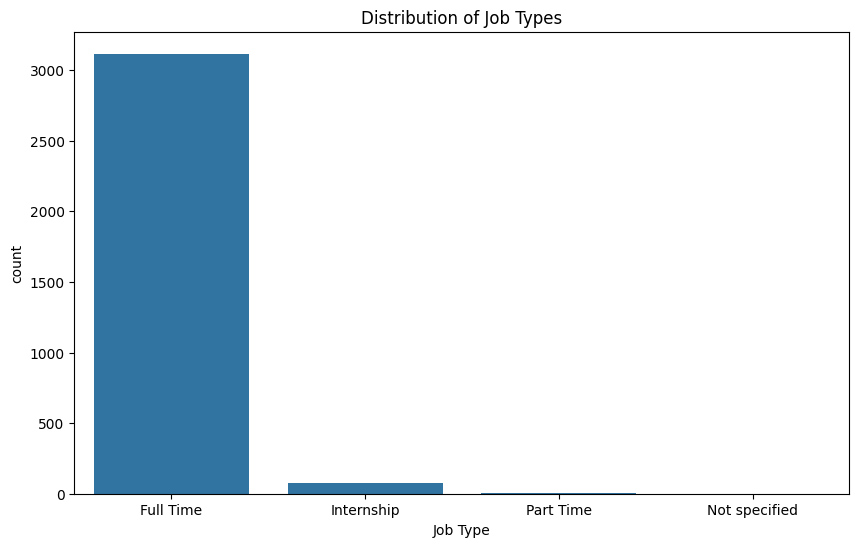

In [5]:

# Basic statistics
display(data.describe(include='all'))

# Distribution of job types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Job Type')
plt.title('Distribution of Job Types')
plt.show()


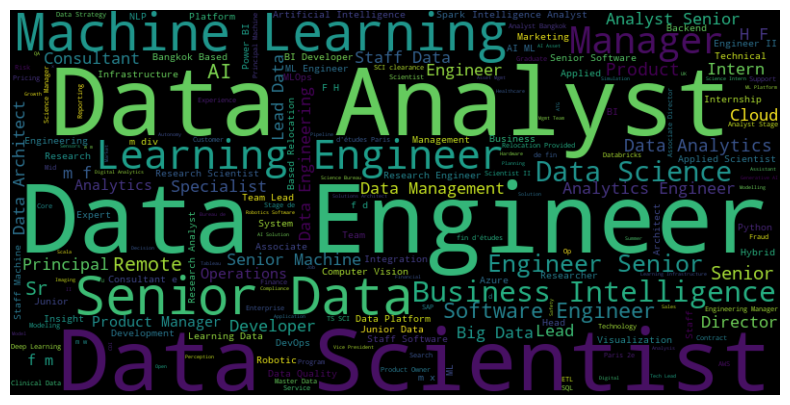

In [6]:

# Word cloud for job titles
job_titles = ' '.join(data['Job Title'])
wordcloud = WordCloud(width=800, height=400).generate(job_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


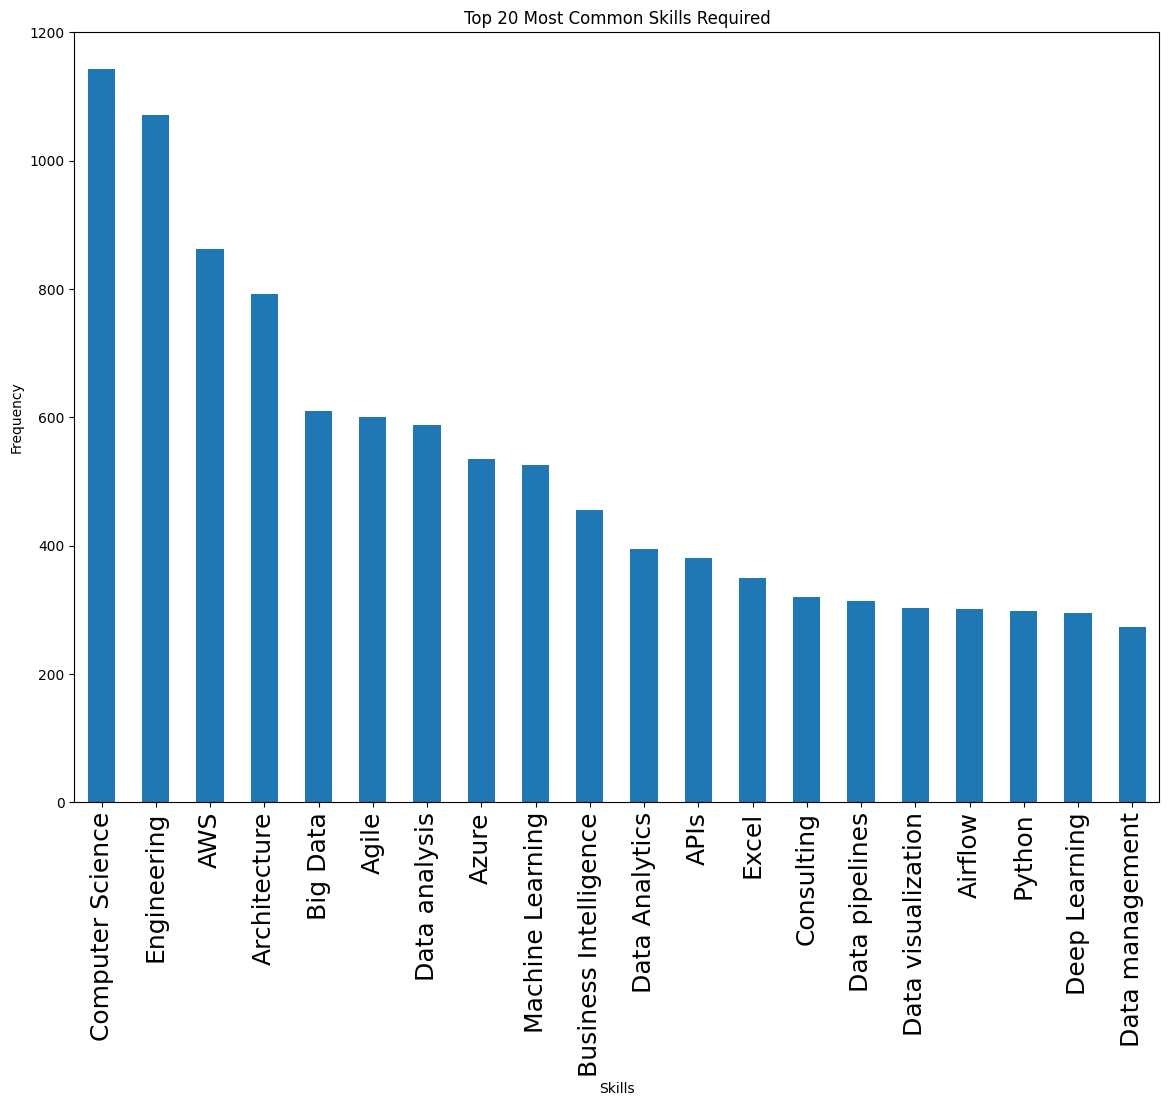

In [7]:

# Remove any blank values and get the top 20 skills
skills_series = data['Requirment of the company '].str.cat(sep=',').split(',')
skills_series = [skill.strip() for skill in skills_series if skill.strip()]  # Remove blanks
skills_counts = pd.Series(skills_series).value_counts().head(20)

# Plot the top 20 skills
plt.figure(figsize=(14, 10))
skills_counts.plot(kind='bar')
plt.title('Top 20 Most Common Skills Required')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=18)
plt.show()


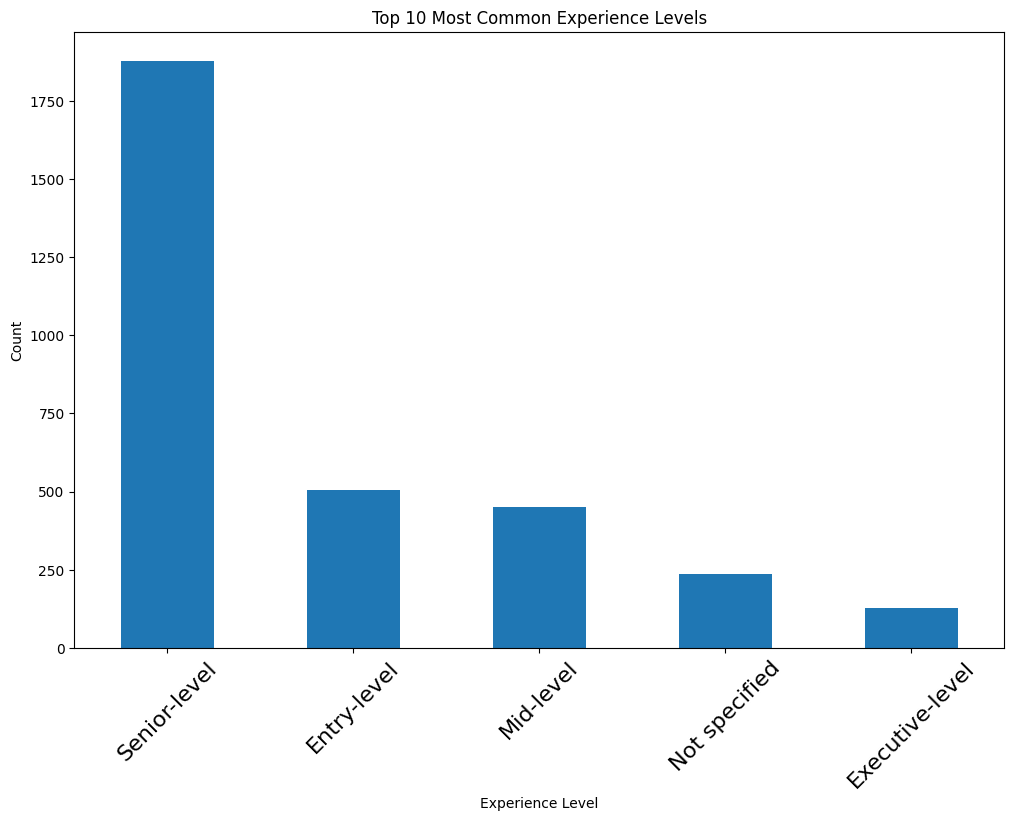

In [8]:
# Most common experience levels
experience_counts = data['Experience level'].value_counts().head(10)
plt.figure(figsize=(12, 8))
experience_counts.plot(kind='bar')
plt.title('Top 10 Most Common Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=16)
plt.show()

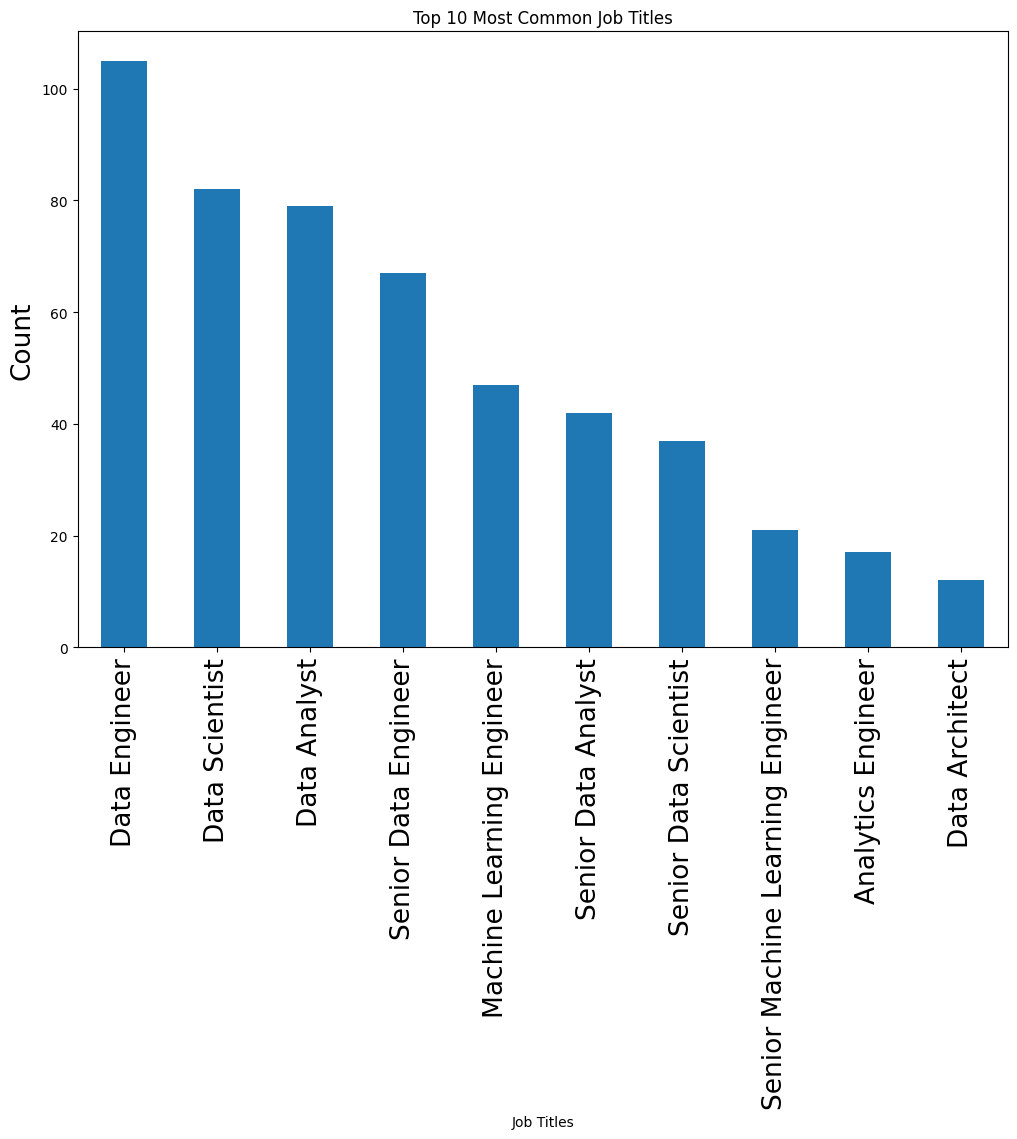

In [9]:
# Most common job titles
job_title_counts = data['Job Title'].value_counts().head(10)
plt.figure(figsize=(12, 8))
job_title_counts.plot(kind='bar')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Count', fontsize=19)
plt.xticks(rotation=90, fontsize=19)
plt.show()

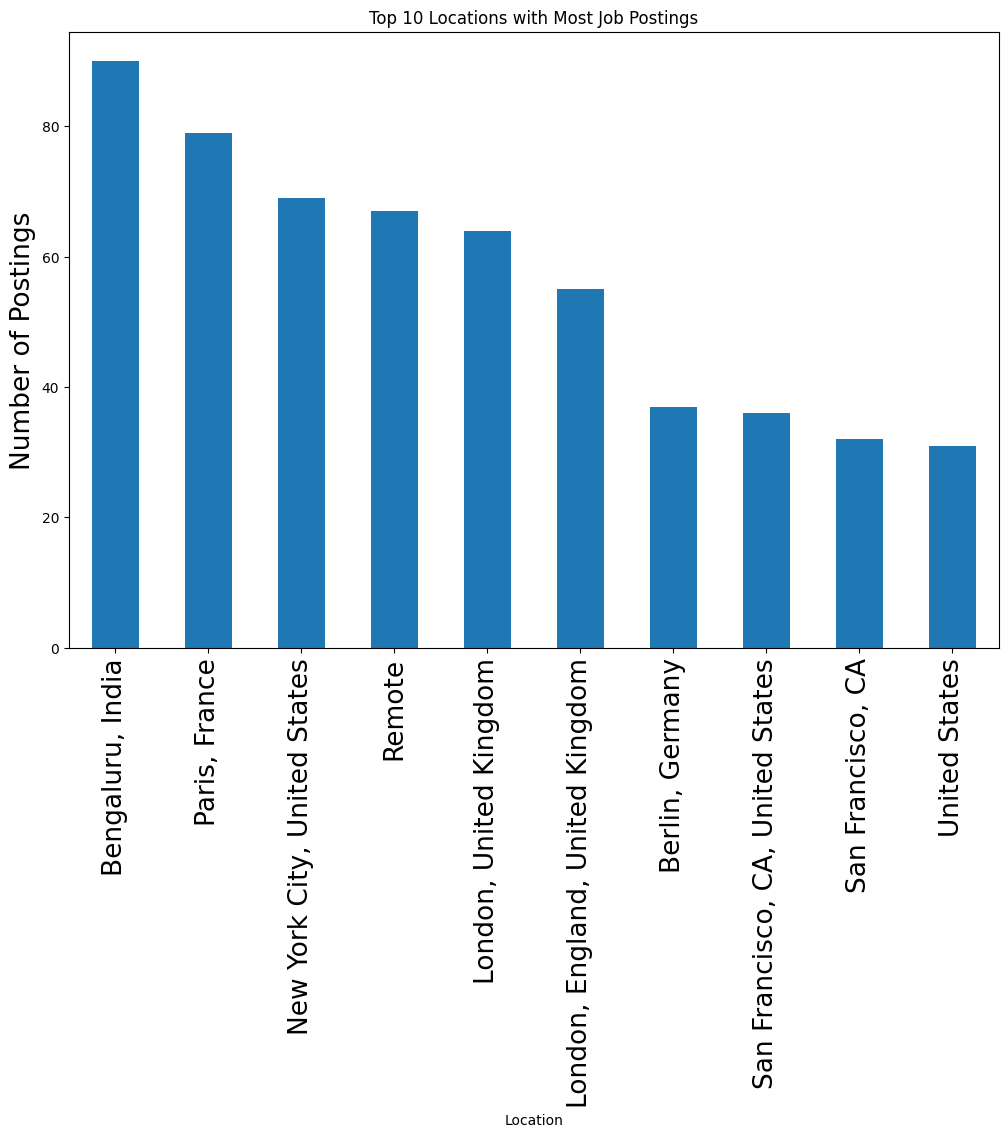

In [10]:
# Top 10 locations with the most job postings
location_counts = data['Location'].value_counts().head(10)
plt.figure(figsize=(12, 8))
location_counts.plot(kind='bar')
plt.title('Top 10 Locations with Most Job Postings')
plt.xlabel('Location')
plt.ylabel('Number of Postings', fontsize=19)
plt.xticks(rotation=90,fontsize=19)
plt.show()

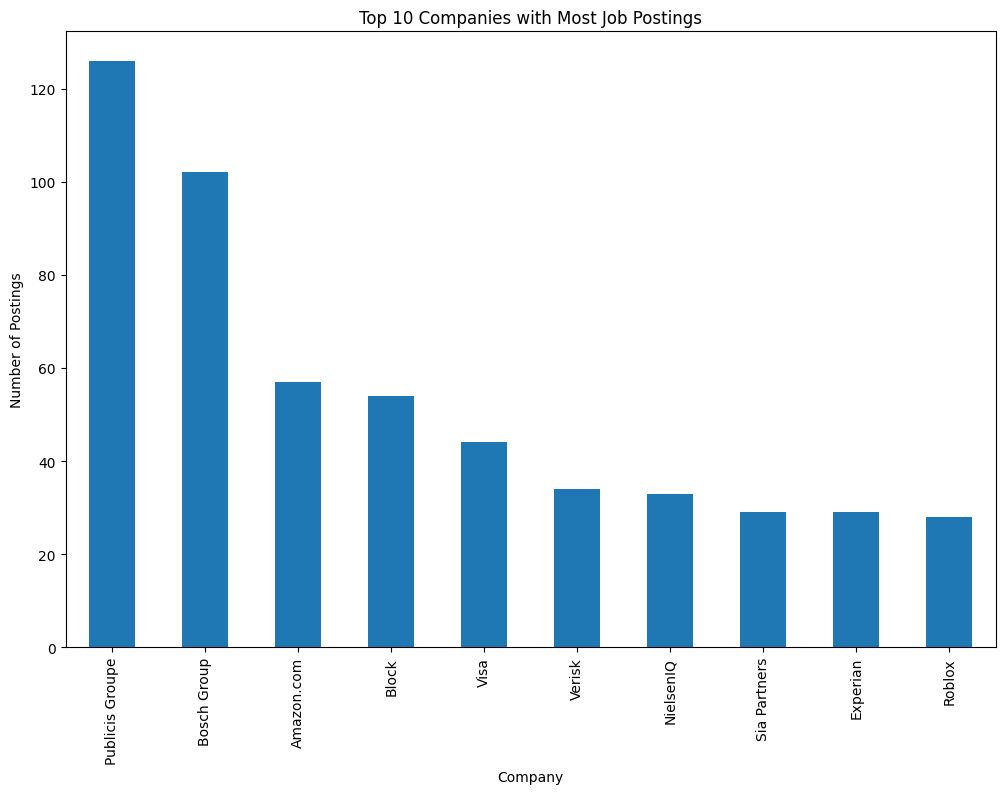

In [11]:
# Top 10 companies with the most job postings
company_counts = data['Company'].value_counts().head(10)
plt.figure(figsize=(12, 8))
company_counts.plot(kind='bar')
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Company')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.show()

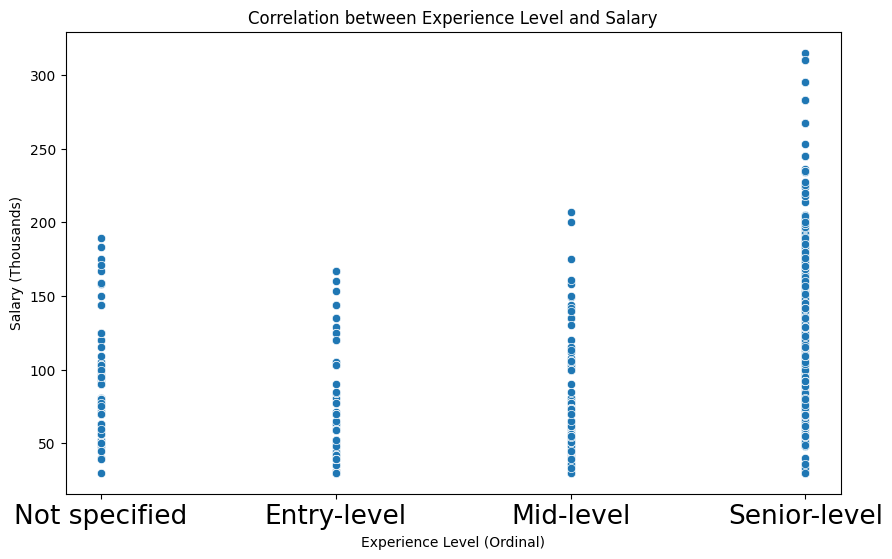

In [18]:
# Convert 'Salary' to numeric values
data['Numeric Salary'] = data['Salary'].str.extract('(\d+)').astype(float)

# Ordinal encoding for 'Experience level'
experience_map = {'Entry-level': 1, 'Mid-level': 2, 'Senior-level': 3, 'Not specified': 0}
data['Experience Level Ordinal'] = data['Experience level'].map(experience_map)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Experience Level Ordinal', y='Numeric Salary', data=data)
plt.title('Correlation between Experience Level and Salary')
plt.xlabel('Experience Level (Ordinal)')
plt.ylabel('Salary (Thousands)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Not specified', 'Entry-level', 'Mid-level', 'Senior-level'], fontsize=19)
plt.show()


C:\Users\yassi\AppData\Local\Temp\ipykernel_10224\2104473887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_data['Job Title'] = pd.Categorical(top_3_data['Job Title'], categories=top_3_titles, ordered=True)
C:\Users\yassi\AppData\Local\Temp\ipykernel_10224\2104473887.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Job Title', y='Numeric Salary', data=top_3_data, estimator=np.mean, ci=None, order=top_3_titles)


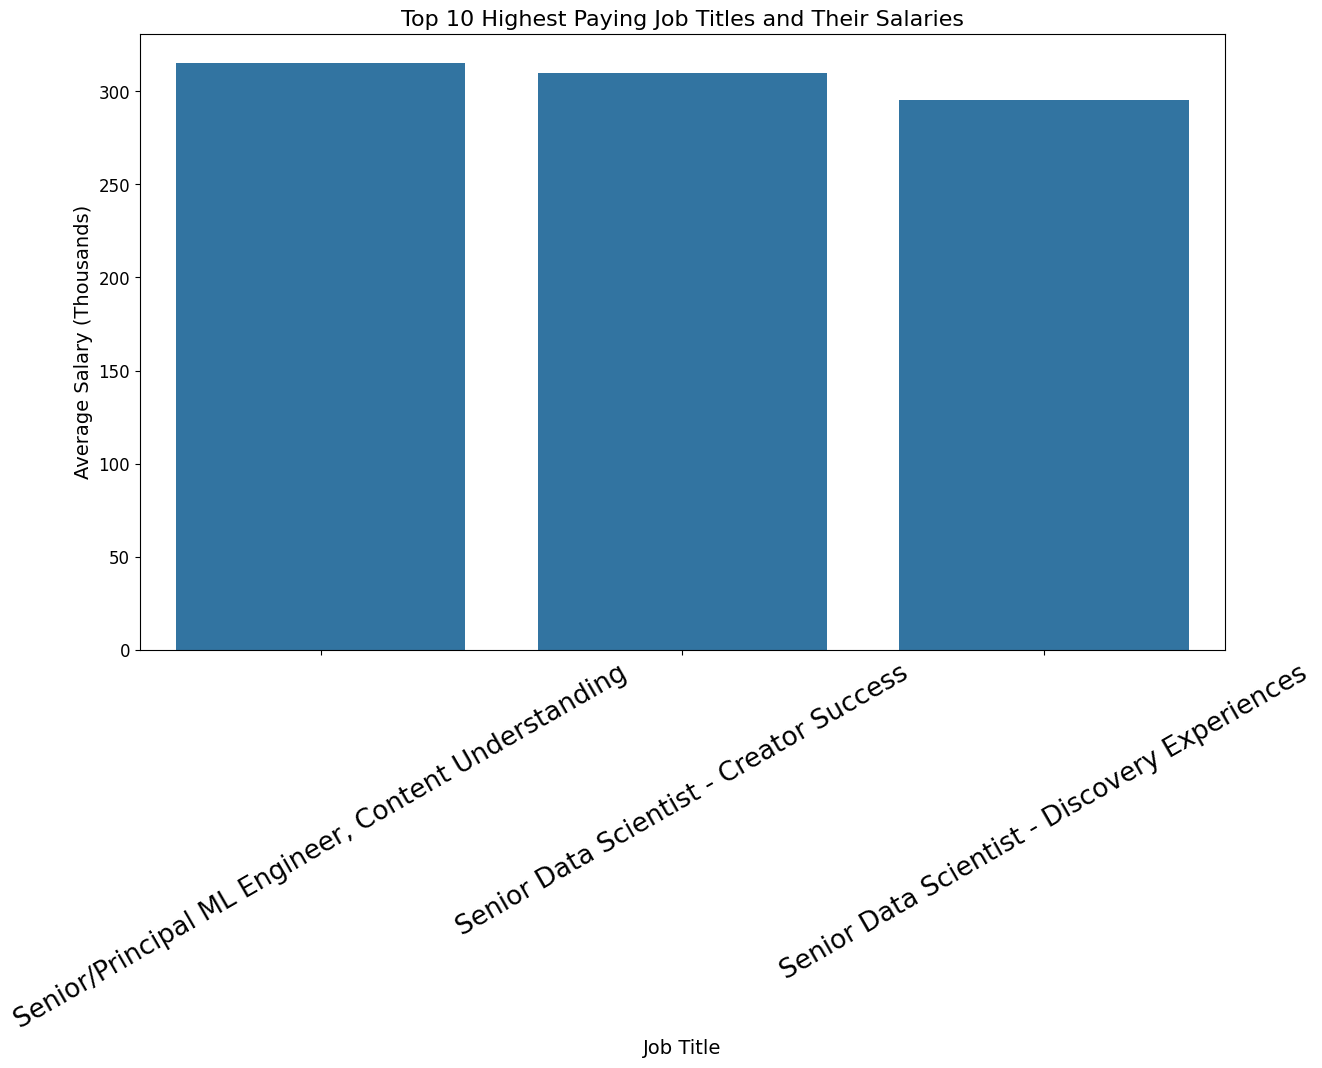

In [13]:
# Convert 'Salary' to numeric values
data['Numeric Salary'] = data['Salary'].str.extract('(\d+)').astype(float)
average_salaries = data.groupby('Job Title')['Numeric Salary'].mean().sort_values(ascending=False)
top_3_titles = average_salaries.head(3).index
top_3_data = data[data['Job Title'].isin(top_3_titles)]
top_3_data['Job Title'] = pd.Categorical(top_3_data['Job Title'], categories=top_3_titles, ordered=True)
plt.figure(figsize=(14, 8))
sns.barplot(x='Job Title', y='Numeric Salary', data=top_3_data, estimator=np.mean, ci=None, order=top_3_titles)
plt.title('Top 10 Highest Paying Job Titles and Their Salaries', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Average Salary (Thousands)', fontsize=14)
plt.xticks(rotation=30, fontsize=19) 
plt.yticks(fontsize=12)
plt.show()



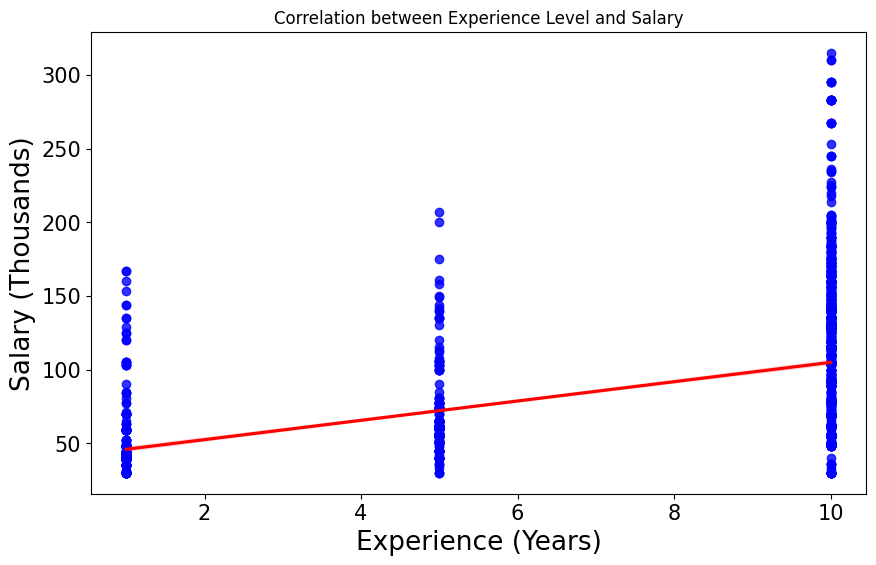

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Salary' to numeric values
data['Numeric Salary'] = data['Salary'].str.extract('(\d+)').astype(float)

# Ordinal encoding for 'Experience level'
experience_map = {'Entry-level': 1, 'Mid-level': 5, 'Senior-level': 10}
data['Experience (Years)'] = data['Experience level'].map(experience_map)

# Create scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='Experience (Years)', y='Numeric Salary', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Correlation between Experience Level and Salary')
plt.xlabel('Experience (Years)', fontsize=19)
plt.ylabel('Salary (Thousands)', fontsize=19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

